# A more complex problem? (Work in progress)

### Best Solution Selection

The results of the previous study suggest that for the simple problem we are considering, all the optimizations in which at every iteration the circuit is measured at least 64 times, provide a solution containing the optimal solution. 

In general, we may expect that for more complex problems, just a fraction of the optimizations fulfills this goal.
In that case, we would like to find a way to select a solution that with large probability contains the optimal solution.

For this, we can try building a more complex problem, so that solving it is not as trivial as in the previous case.

In [1]:
# To import all the functions defined in the Max_Cut notebook
from  Functions import *

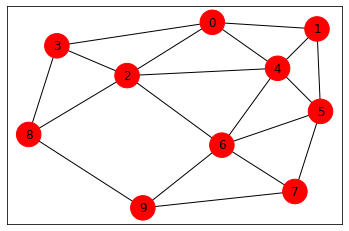

In [2]:
# Tools to handle general graphs
import networkx as nx

import numpy as np
import matplotlib.pyplot as plt 

# Graph parameters 
n2 = 10
V2 = np.arange(0, n2, 1)
E2 = [(0, 1, 2.0),
      (0, 2, 1.0),
      (3, 2, 3.0),
      (0, 4, 3.0),
      (4, 2, 1.0),
      (7, 6, 1.0),
      (6, 5, 1.0),
      (5, 4, 6.0),
      (5, 1, 1.0),
      (0, 3, 1.0),
      (6, 2, 1.0),
      (4, 1, 5.0),
      (5, 7, 2.0),
      (3, 8, 1.0),
      (2, 8, 1.0),
      (6, 9, 1.0),
      (7, 9, 1.0),
      (8, 9, 1.0),
      (4, 6, 1.0)] 

# Generating the graph with 10 nodes
G2 = nx.Graph()
G2.add_nodes_from(V2)
G2.add_weighted_edges_from(E2)

# Plot the graph
colors       = ['r' for node in G2.nodes()]
default_axes = plt.axes(frameon=True)
pos          = nx.spring_layout(G2)

nx.draw_networkx(G2, 
                 node_color = colors, 
                 node_size  = 600, 
                 alpha      = 1, 
                 ax         = default_axes, 
                 pos        = pos)

W2 = 
[[0. 2. 1. 1. 3. 0. 0. 0. 0. 0.]
 [2. 0. 0. 0. 5. 1. 0. 0. 0. 0.]
 [1. 0. 0. 3. 1. 0. 1. 0. 1. 0.]
 [1. 0. 3. 0. 0. 0. 0. 0. 1. 0.]
 [3. 5. 1. 0. 0. 6. 1. 0. 0. 0.]
 [0. 1. 0. 0. 6. 0. 1. 2. 0. 0.]
 [0. 0. 1. 0. 1. 1. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 2. 1. 0. 0. 1.]
 [0. 0. 1. 1. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 0.]]
case = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0] score = 0.0
case = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0] score = 7.0
case = [0, 1, 0, 0, 0, 0, 0, 0, 0, 0] score = 8.0
case = [1, 1, 0, 0, 0, 0, 0, 0, 0, 0] score = 11.0
case = [1, 0, 1, 0, 0, 0, 0, 0, 0, 0] score = 12.0
case = [0, 1, 1, 0, 0, 0, 0, 0, 0, 0] score = 15.0
case = [1, 1, 1, 0, 0, 0, 0, 0, 0, 0] score = 16.0
case = [0, 0, 0, 0, 1, 0, 0, 0, 0, 0] score = 16.0
case = [1, 0, 0, 0, 1, 0, 0, 0, 0, 0] score = 17.0
case = [0, 0, 1, 0, 1, 0, 0, 0, 0, 0] score = 21.0
case = [0, 0, 0, 1, 1, 0, 0, 0, 0, 0] score = 21.0
case = [1, 0, 1, 0, 0, 1, 0, 0, 0, 0] score = 22.0
case = [0, 1, 1, 0, 0, 1, 0, 0, 0, 0] score = 23.0
cas

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

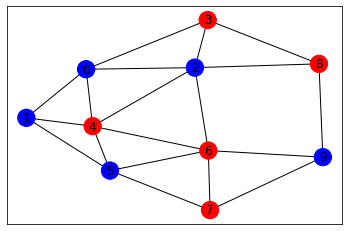

In [16]:
import numpy as np
import networkx as nx

# number of characters
n2 = 10

# W matrix definition
W2 = np.zeros((n2,n2))

for i in range(len(E2)):
    W2[E2[i][0]][E2[i][1]] = E2[i][2] 
    W2[E2[i][1]][E2[i][0]] = E2[i][2] 

print("W2 = ")  
print(W2)

best_cost_brute = 0

# computing all possible combinations
for b in range(2**n2):
    # x stores all the 2^n possible combinations of 0 and 1
    # for a vector of length n 
    x = [int(t) for t in reversed(list(bin(b)[2:].zfill(n2)))]

    # initialize cost function value
    cost = 0
    # scan all possible costs and keep the highest one
    # (now we want to maximize our score!)
    for i in range(n2):
        for j in range(n2):
            cost = cost + W2[i,j]*x[i]*(1 - x[j])
    if best_cost_brute <= cost:
        best_cost_brute = cost
        xbest_brute = x 
        print('case = ' + str(x) + ' score = ' + str(cost))

# Showing results    
colors = ['r' if xbest_brute[i] == 0 else 'b' for i in range(n2)]
nx.draw_networkx(G2, node_color=colors)
#print('\nBest solution = ' + str(xbest_brute) + ' cost = ' + str(best_cost_brute)) 

### Optimization using mean value

In [ ]:
# Variables declaration
WEIGHTS    = W2
N_QBITS    = n2
DEPTH      = 2
SHOTS      = 64
BACKEND    = 'qasm_simulator'
FINAL_EVAL = 128
COST       = 'cost'

In [ ]:
# A small scan, but we can get some results

N_repetitions = 100
shots_list = [8, 16, 32, 64, 128]

for shot in shots_list:
    results_current = []
    output = 0
    file_name = "Scan_" + str(n2) + "qbits_" + str(shot) + ".pkl"
    for rep in range(N_repetitions): 
        output = time_vs_shots(shot,
                               WEIGHTS,
                               N_QBITS,
                               DEPTH,
                               BACKEND,
                               FINAL_EVAL,
                               COST) 
        
        if rep % 20 == 0:
            print("Done with", str(shot), "shots, repetition", rep)
        results_current.append(output)

    save_object(results_current, file_name) 

In [5]:
# Load results
import pickle

scan = []

shots_list = [8, 16, 32, 64, 128]

for shot in shots_list:
    load_file_name = "Scan_" + str(n2) + "qbits_" + str(shot) + ".pkl"
    with open(load_file_name, 'rb') as input:
        for pick in pickle.load(input): 
            scan.append(pick)

# Normalize results for plotting
for res in scan:
    for key, value in res[1].items():
        res[1][key] = res[1][key] / res[4]

In [20]:
print("Percentage of solutions containing the optimal solution:")
print()

frac_list = np.array([])

for shot in shots_list:
    frac = F_opt_finder(scan, shot, W2, ['0001101110','1110010001'])
    frac_list = np.append(frac_list, frac)
    print("Case {0} shots: {1}%".format(shot,frac*100))

Percentage of solutions containing the optimal solution:

Case 8 shots: 23.0%
Case 16 shots: 24.0%
Case 32 shots: 18.0%
Case 64 shots: 21.0%
Case 128 shots: 32.0%


In [22]:
# Prepare the results so that it is easier to plot them

# Create list of times
ntimes = np.array([])
for i in range(len(scan)):
    ntimes = np.append(ntimes, scan[i][0])
#print(ntimes)

# Create list of nfev
nfevs = np.array([])
for i in range(len(scan)):
    nfevs = np.append(nfevs, scan[i][3])
#print(nfevs)

# Create list of shots
nshots = np.array([])
for i in range(len(scan)):
    nshots = np.append(nshots, scan[i][2])
#print(nshots)

# Create list of number of eigenstates in the solution
neigenst = np.array([])
for i in range(len(scan)):
    neigenst = np.append(neigenst, len(scan[i][1]))
#print(neigenst)

# Create list of cost function values
ncost = np.array([])
for i in range(len(scan)):
    ncost = np.append(ncost, cost_function_C(scan[i][1], W2))
#print(ncost)

In [24]:
# Put the lists in a dataframe
import pandas as pd

df = pd.DataFrame(list(zip(ntimes, nfevs, nshots, neigenst, ncost)), 
               columns =['time', 'nfevs', 'shots', 'eigenstates', 'cost_func'])

df.head(5)

,time,nfevs,shots,eigenstates,cost_func
0,9.003126,257.0,8.0,70.0,-16.984375
1,9.066592,236.0,8.0,90.0,-16.992188
2,8.211775,218.0,8.0,93.0,-16.968750
3,8.794767,235.0,8.0,111.0,-18.335938
4,9.390680,250.0,8.0,114.0,-17.406250


In [25]:
# Group by shots and average
df_plot = df.groupby(['shots']).mean()
df_plot.reset_index(level=0, inplace=True)
df_plot["frac"] = frac_list
df_plot

,shots,time,nfevs,eigenstates,cost_func,frac
0,8.0,9.037017,235.54,100.54,-17.116797,0.23
1,16.0,8.767418,238.72,100.03,-17.201641,0.24
2,32.0,9.125660,243.17,94.73,-17.907031,0.18
3,64.0,9.486258,253.13,82.88,-18.923125,0.21
4,128.0,10.196964,270.27,69.54,-20.539922,0.32


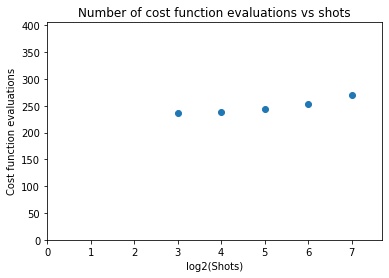

In [40]:
# Cost function evaluations vs log2(shots)
scatter_plot(x       = np.log2(df_plot.shots),
             y       = df_plot.nfevs,
             title   = "Number of cost function evaluations vs shots",
             xlabel  = "log2(Shots)",
             ylabel  = "Cost function evaluations",
             save_as = "nfev_vs_log2shots_avg100_qbit10")

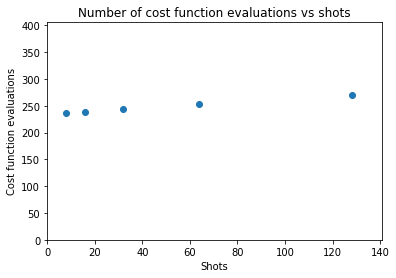

In [41]:
# Cost function evaluations vs shots
scatter_plot(x       = df_plot.shots,
             y       = df_plot.nfevs,
             title   = "Number of cost function evaluations vs shots",
             xlabel  = "Shots",
             ylabel  = "Cost function evaluations",
             save_as = "nfev_vs_shots_avg100_qbit10")

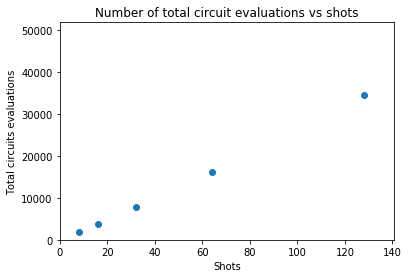

In [42]:
# Total circuit evaluations vs shots
scatter_plot(x       = df_plot.shots,
             y       = df_plot.nfevs*df_plot.shots,
             title   = "Number of total circuit evaluations vs shots",
             xlabel  = "Shots",
             ylabel  = "Total circuits evaluations",
             save_as = "nfev_x_shots_vs_shots_avg100_qbit10")

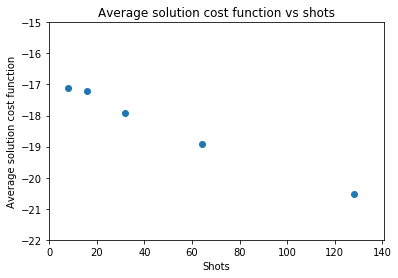

In [43]:
# Average solution cost function vs shots
scatter_plot(x       = df_plot.shots,
             y       = df_plot.cost_func,
             title   = "Average solution cost function vs shots",
             xlabel  = "Shots",
             ylabel  = "Average solution cost function",
             save_as = "cost_vs_shots_avg100_qbit10",
             ylim    = (-22, -15))

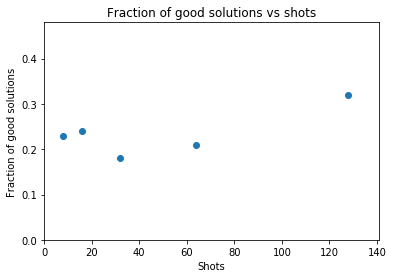

In [27]:
# Fraction of good solutions vs shots
scatter_plot(x       = df_plot.shots,
             y       = df_plot.frac,
             title   = "Fraction of good solutions vs shots",
             xlabel  = "Shots",
             ylabel  = "Fraction of good solutions",
             save_as = "frac_vs_shots_avg100_qbit10")

### Optimization using CVaR

In [4]:
from Functions import *

In [5]:
# Variables declaration
WEIGHTS    = W2
N_QBITS    = n2
DEPTH      = 2
SHOTS      = 64
BACKEND    = 'qasm_simulator'
FINAL_EVAL = 128
COST       = 'cvar'
ALPHA      = 0.5

In [7]:
# A small scan, but we can get some results

N_repetitions = 100
shots_list = [8, 16, 32, 64, 128]

for shot in shots_list:
    results_current = []
    output = 0
    file_name = "Scan_CVaR_" + str(n2) + "qbits_" + str(shot) + ".pkl"
    for rep in range(N_repetitions): 
        output = time_vs_shots(shot,
                               WEIGHTS,
                               N_QBITS,
                               DEPTH,
                               BACKEND,
                               FINAL_EVAL,
                               COST,
                               ALPHA) 
        
        if rep % 20 == 0:
            print("Done with", str(shot), "shots, repetition", rep)
        results_current.append(output)

    save_object(results_current, file_name) 

Done with 8 shots, repetition 0
Done with 8 shots, repetition 20
Done with 8 shots, repetition 40
Done with 8 shots, repetition 60
Done with 8 shots, repetition 80
Object saved as Scan_CVaR_10qbits_8.pkl
Done with 16 shots, repetition 0
Done with 16 shots, repetition 20
Done with 16 shots, repetition 40
Done with 16 shots, repetition 60
Done with 16 shots, repetition 80
Object saved as Scan_CVaR_10qbits_16.pkl
Done with 32 shots, repetition 0
Done with 32 shots, repetition 20
Done with 32 shots, repetition 40
Done with 32 shots, repetition 60
Done with 32 shots, repetition 80
Object saved as Scan_CVaR_10qbits_32.pkl
Done with 64 shots, repetition 0
Done with 64 shots, repetition 20
Done with 64 shots, repetition 40
Done with 64 shots, repetition 60
Done with 64 shots, repetition 80
Object saved as Scan_CVaR_10qbits_64.pkl
Done with 128 shots, repetition 0
Done with 128 shots, repetition 20
Done with 128 shots, repetition 40
Done with 128 shots, repetition 60
Done with 128 shots, repeti

In [7]:
# Load CVaR results 
import pickle

scan_CVaR = []

shots_list = [8, 16, 32, 64, 128]

for shot in shots_list:
    load_file_name = "Scan_CVaR_" + str(n2) + "qbits_" + str(shot) + ".pkl"
    with open(load_file_name, 'rb') as input:
        for pick in pickle.load(input): 
            scan_CVaR.append(pick)

# Normalize results for plotting
for res in scan_CVaR:
    for key, value in res[1].items():
        res[1][key] = res[1][key] / res[4]

In [18]:
print("Percentage of solutions containing the optimal solution:")
print()

frac_list_CVaR = np.array([])

for shot in shots_list:
    frac = F_opt_finder(scan_CVaR, shot, W2, ['0001101110','1110010001'])
    frac_list_CVaR = np.append(frac_list_CVaR, frac)
    print("Case {0} shots: {1}%".format(shot, frac*100))

Percentage of solutions containing the optimal solution:

Case 8 shots: 23.0%
Case 16 shots: 28.999999999999996%
Case 32 shots: 27.0%
Case 64 shots: 44.0%
Case 128 shots: 52.0%


array([0.23, 0.29, 0.27, 0.44, 0.52])

In [9]:
# Prepare the results so that it is easier to plot them

# Create list of times
ntimes_CVaR = np.array([])
for i in range(len(scan_CVaR)):
    ntimes_CVaR = np.append(ntimes_CVaR, scan_CVaR[i][0])
#print(ntimes_CVaR)

# Create list of nfev
nfevs_CVaR = np.array([])
for i in range(len(scan_CVaR)):
    nfevs_CVaR = np.append(nfevs_CVaR, scan_CVaR[i][3])
#print(nfevs_CVaR)

# Create list of shots
nshots_CVaR = np.array([])
for i in range(len(scan_CVaR)):
    nshots_CVaR = np.append(nshots_CVaR, scan_CVaR[i][2])
#print(nshots_CVaR)

# Create list of number of eigenstates in the solution
neigenst_CVaR = np.array([])
for i in range(len(scan_CVaR)):
    neigenst_CVaR = np.append(neigenst_CVaR, len(scan_CVaR[i][1]))
#print(neigenst_CVaR)

# Create list of cost function values
ncost_CVaR = np.array([])
for i in range(len(scan_CVaR)):
    ncost_CVaR = np.append(ncost_CVaR, cost_function_C(scan_CVaR[i][1], W2))
#print(ncost_CVaR)

In [10]:
# Put the lists in a dataframe
import pandas as pd

df_CVaR = pd.DataFrame(list(zip(ntimes_CVaR, nfevs_CVaR, nshots_CVaR, neigenst_CVaR, ncost_CVaR)), 
               columns =['time', 'nfevs', 'shots', 'eigenstates', 'CVaR'])

df_CVaR.head(5)

,time,nfevs,shots,eigenstates,CVaR
0,11.148611,269.0,8.0,97.0,-15.757812
1,9.319093,228.0,8.0,110.0,-16.109375
2,9.617552,234.0,8.0,96.0,-16.421875
3,9.092185,223.0,8.0,113.0,-16.335938
4,9.786066,231.0,8.0,107.0,-17.015625


In [19]:
# Group by shots and average
df_CVaR_plot = df_CVaR.groupby(['shots']).mean()
df_CVaR_plot.reset_index(level=0, inplace=True)
df_CVaR_plot["frac"] = frac_list_CVaR
df_CVaR_plot

,shots,time,nfevs,eigenstates,CVaR,frac
0,8.0,9.759604,231.96,100.44,-17.088047,0.23
1,16.0,9.849549,234.54,97.87,-17.456094,0.29
2,32.0,10.204071,240.51,91.72,-18.066094,0.27
3,64.0,10.916213,253.90,79.41,-19.308906,0.44
4,128.0,11.755145,271.51,58.46,-21.167344,0.52


No handles with labels found to put in legend.


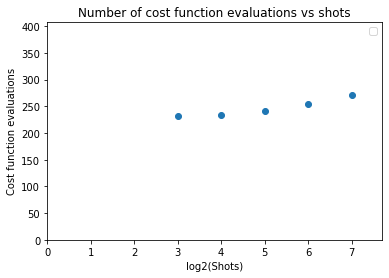

In [38]:
# Cost function evaluations vs log2(shots)
scatter_plot(x       = np.log2(df_CVaR_plot.shots),
             y       = df_CVaR_plot.nfevs,
             title   = "Number of cost function evaluations vs shots",
             xlabel  = "log2(Shots)",
             ylabel  = "Cost function evaluations",
             save_as = "nfev_vs_log2shots_avg100_qbit10_CVaR")

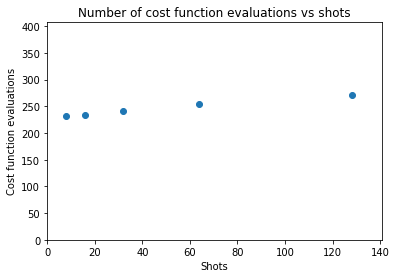

In [13]:
# Cost function evaluations vs shots
scatter_plot(x       = df_CVaR_plot.shots,
             y       = df_CVaR_plot.nfevs,
             title   = "Number of cost function evaluations vs shots",
             xlabel  = "Shots",
             ylabel  = "Cost function evaluations",
             save_as = "nfev_vs_shots_avg100_qbit10_CVaR")

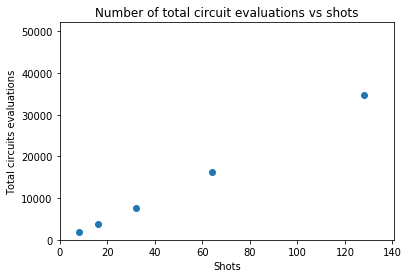

In [14]:
# Total circuit evaluations vs shots
scatter_plot(x       = df_CVaR_plot.shots,
             y       = df_CVaR_plot.nfevs*df_CVaR_plot.shots,
             title   = "Number of total circuit evaluations vs shots",
             xlabel  = "Shots",
             ylabel  = "Total circuits evaluations",
             save_as = "nfev_x_shots_vs_shots_avg100_qbit10_CVaR")

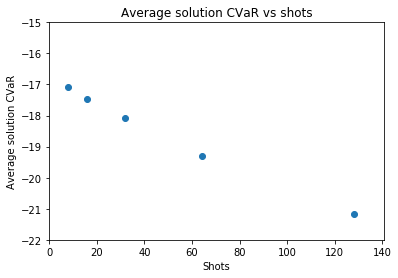

In [15]:
# Average solution cost function vs shots
scatter_plot(x       = df_CVaR_plot.shots,
             y       = df_CVaR_plot.CVaR,
             title   = "Average solution CVaR vs shots",
             xlabel  = "Shots",
             ylabel  = "Average solution CVaR",
             save_as = "cost_vs_shots_avg100_qbit10_CVaR",
             ylim    = (-22, -15))

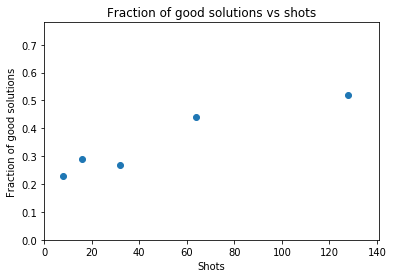

In [26]:
# Fraction of good solutions vs shots
scatter_plot(x       = df_CVaR_plot.shots,
             y       = df_CVaR_plot.frac,
             title   = "Fraction of good solutions vs shots",
             xlabel  = "Shots",
             ylabel  = "Fraction of good solutions",
             save_as = "frac_vs_shots_avg100_qbit10_CVaR")

### Mean value vs CVaR

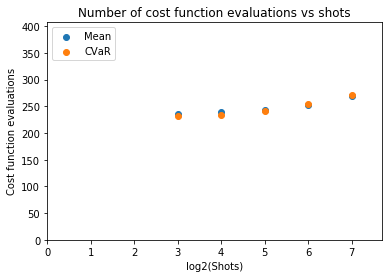

In [41]:
# Cost function evaluations vs log2(shots)
plot_comparison(x       = [np.log2(df_plot.shots), np.log2(df_CVaR_plot.shots)],
                y       = [df_plot.nfevs, df_CVaR_plot.nfevs],
                legend  = ["Mean", "CVaR"],
                title   = "Number of cost function evaluations vs shots",
                xlabel  = "log2(Shots)",
                ylabel  = "Cost function evaluations",
                leg_loc = "upper left",
                save_as = "nfev_vs_log2shots_avg100_qbit10_comparison")

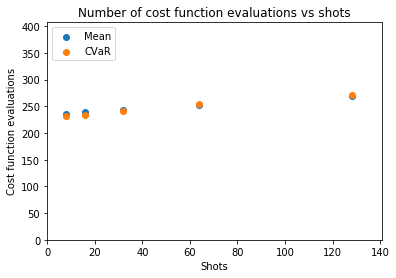

In [43]:
# Cost function evaluations vs shots
plot_comparison(x       = [df_plot.shots, df_CVaR_plot.shots],
                y       = [df_plot.nfevs, df_CVaR_plot.nfevs],
                legend  = ["Mean", "CVaR"],
                title   = "Number of cost function evaluations vs shots",
                xlabel  = "Shots",
                ylabel  = "Cost function evaluations",
                leg_loc = "upper left",
                save_as = "nfev_vs_shots_avg100_qbit10_comparison")

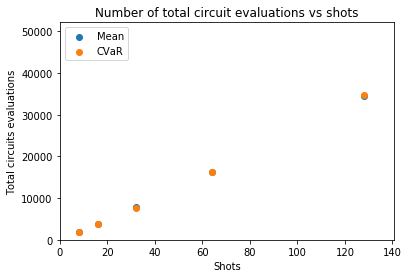

In [44]:
# Total circuit evaluations vs shots
plot_comparison(x       = [df_plot.shots, df_CVaR_plot.shots],
                y       = [df_plot.nfevs*df_plot.shots, df_CVaR_plot.nfevs*df_CVaR_plot.shots],
                legend  = ["Mean", "CVaR"],
                title   = "Number of total circuit evaluations vs shots",
                xlabel  = "Shots",
                ylabel  = "Total circuits evaluations",
                leg_loc = "upper left",
                save_as = "nfev_x_shots_vs_shots_avg100_qbit10_comparison")

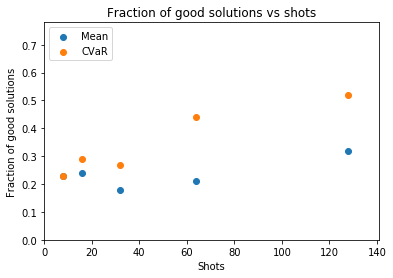

In [45]:
# Fraction of good solutions vs shots
plot_comparison(x       = [df_plot.shots, df_CVaR_plot.shots],
                y       = [df_plot.frac, df_CVaR_plot.frac],
                legend  = ["Mean", "CVaR"],
                title   = "Fraction of good solutions vs shots",
                xlabel  = "Shots",
                ylabel  = "Fraction of good solutions",
                leg_loc = "upper left",
                save_as = "frac_vs_shots_avg100_qbit10_comparison")